In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [2]:
from ld_gan import visualize
import numpy as np

<IPython.core.display.Javascript object>


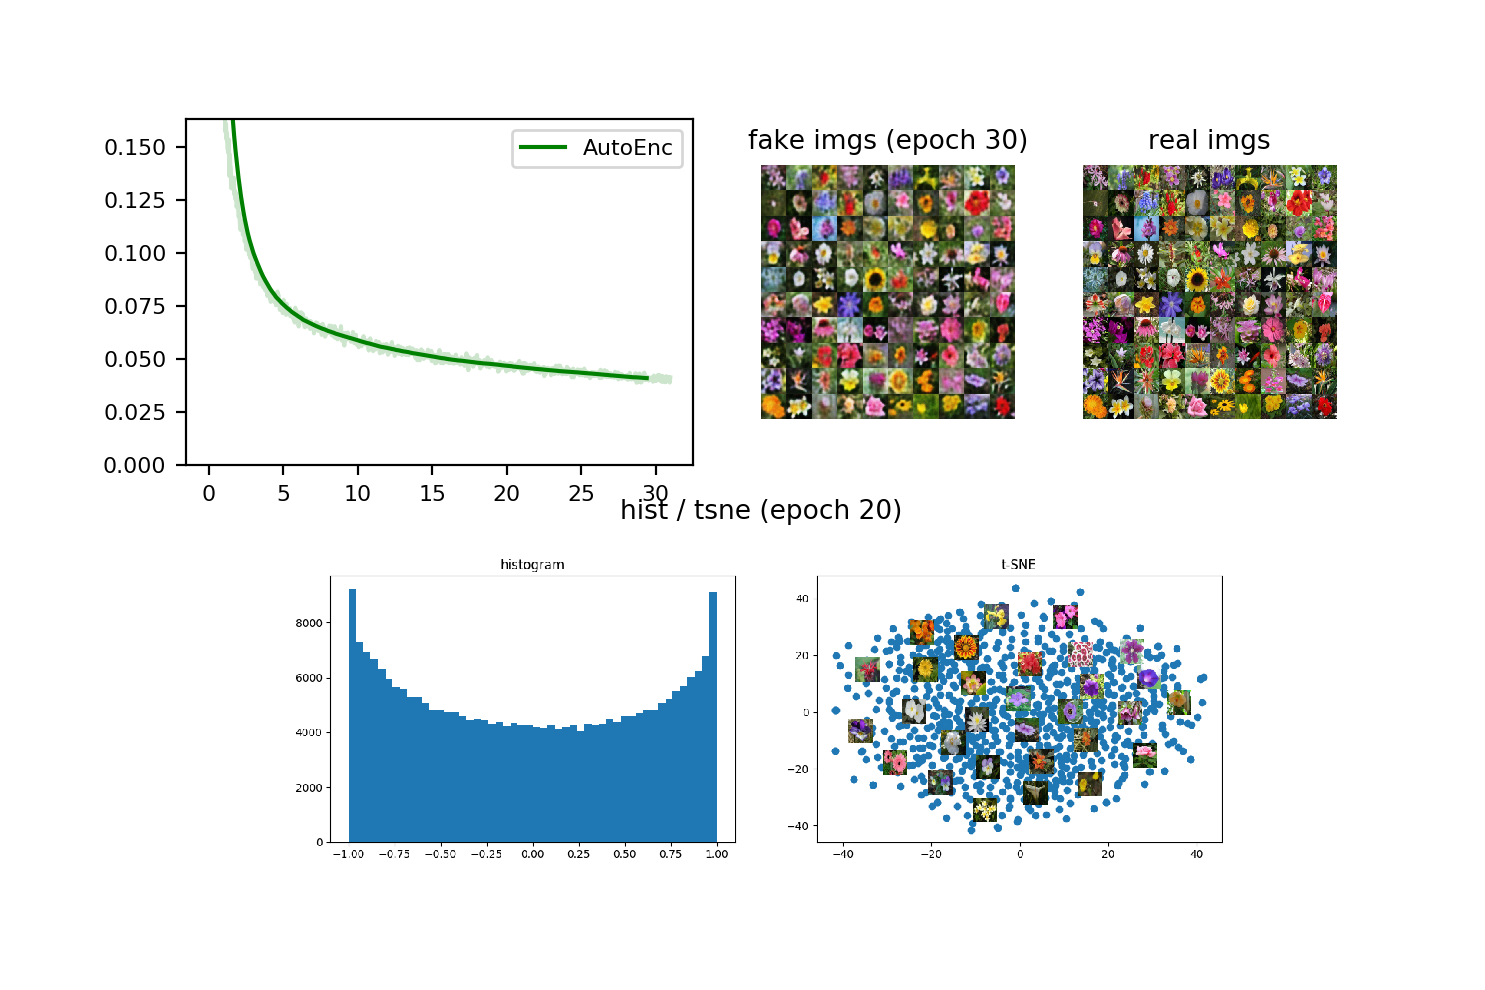

In [43]:
visualize.learning_curve_ia(
                            "xf_enc_test.py", 
                            high_res=True,
                            show_hist_tsne=True
                            )

<IPython.core.display.Javascript object>


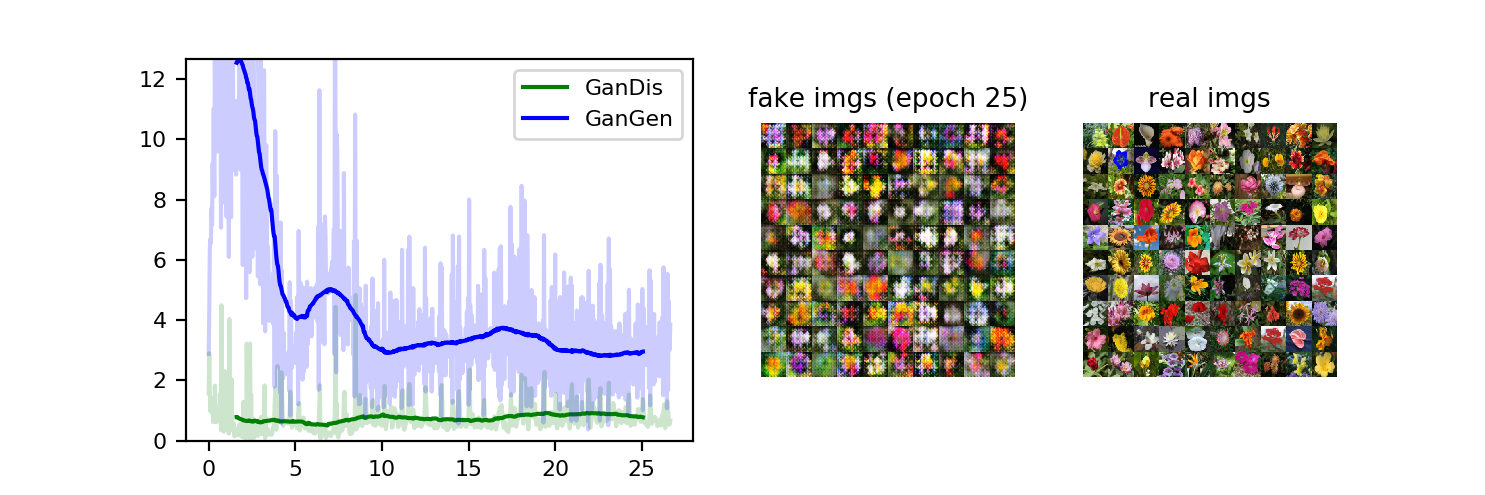

In [44]:
visualize.learning_curve_ia(
                            "xf_dcgan_test.py", 
                            high_res=True,
                            show_hist_tsne=False
                            )

<IPython.core.display.Javascript object>


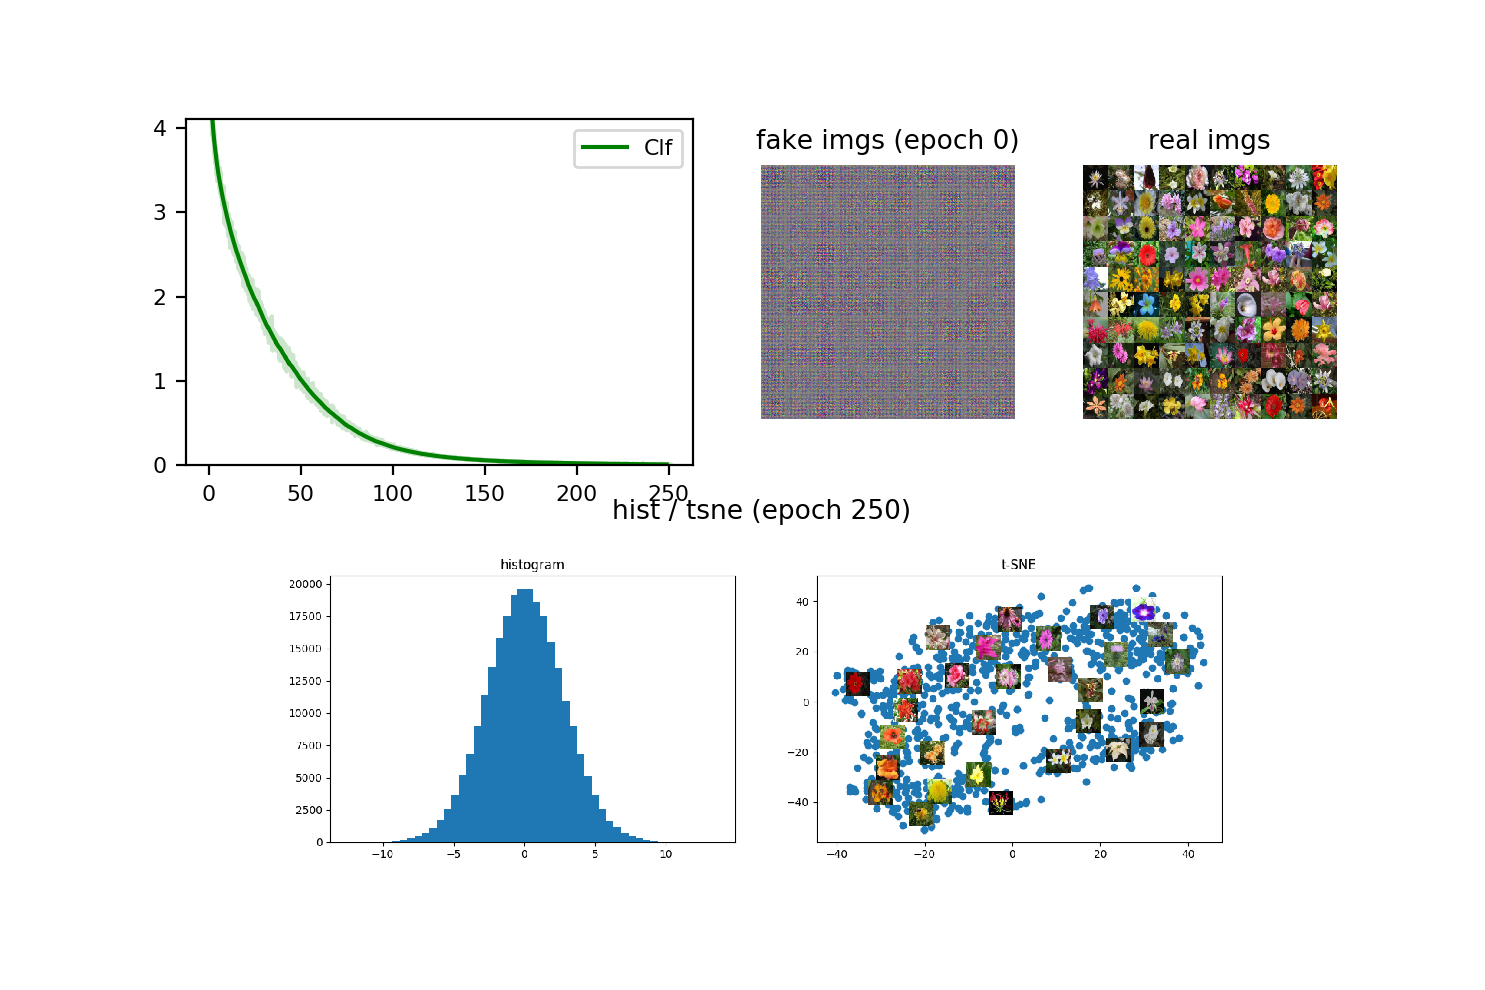

In [48]:
visualize.learning_curve_ia("xf_clf_test.py", 
                            high_res=True,
                            show_hist_tsne=True
                            )

In [ ]:
visualize.learning_curve_ia("xf_11111.py", 
                            high_res=True,
                            show_hist_tsne=True
                            )